# EPOCH Mini Project
- 공공 도서관 데이터
    - 2020 ~ 2021년, 국립 중앙 도서관
    - [프로젝트 안내](https://file.notion.so/f/f/6e4351d1-ed91-4b42-b856-3661f9da0ed2/7fcfcdd1-b155-4e2d-9e90-74bf86736e4d/EPOCH_MiniProject_%EC%A3%BC%EC%9A%94%EC%95%88%EB%82%B4.pdf?table=block&id=1c80de90-854f-8021-9337-ebfa9c28f572&spaceId=6e4351d1-ed91-4b42-b856-3661f9da0ed2&expirationTimestamp=1743724800000&signature=e83tQZtwsN39XR8MWcJOoPaLu_YkXX0ju5LSY6bw05E&downloadName=EPOCH_MiniProject_%EC%A3%BC%EC%9A%94%EC%95%88%EB%82%B4.pdf)

## 1. 데이터셋 불러오기

In [1]:
import numpy as np
import pandas as pd
# from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
# import plotly.express as px

# import requests
import os
import json
import pickle        # pickle 모듈 불러오기 (피클 파일 처리)

from datetime import datetime
from datetime import timedelta
# import missingno as msno

import category_encoders as ce
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import folium
from folium import Choropleth, DivIcon
import geopandas as gpd
from IPython.display import display

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option("display.max_columns", None)

# 시각화 폰트 설정 (본고딕)
plt.rc('font', family='Noto Sans KR')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
# 인기 대출 front
# merged_dataset = pd.read_pickle("data/merged_dataset.pkl")
merged_dataset = pd.read_csv("data/merged_dataset.csv")
print("merged_dataset 파일을 성공적으로 불러왔습니다.")

merged_dataset 파일을 성공적으로 불러왔습니다.


In [3]:
# # 피클 파일을 열고 데이터를 로드합니다.
# with open("data/merged_dataset.pkl", 'rb') as file:
#     data = pickle.load(file)

In [4]:
merged_dataset.head(3)

,Unnamed: 0,AUTHR_NM,PBLICTE_YEAR,LBRRY_CD,ISBN_THIRTEEN_NO,ANALS_LON_TOT_CO,Rank,KDC_NUM,KDC_GENRE,LBRRY_NM,LBRRY_ADDR,ONE_AREA_NM,TWO_AREA_NM,LBRRY_TY_CD,LBRRY_TY_NM,FOND_MBY_VALUE,AREA_CD
0,0,데브라 N. 맨커프 지음 ;안희정 옮김,2021,1501,9791155813386,5908795.0,8148.0,600.0,예술,포천시립소흘도서관,경기도 포천시 소흘읍 송우로 101-29,경기도,포천시,1,공공,지자체,7
1,1,"박형주,김지연 지음",2020,1501,9788988964477,83228337.0,2139.0,200.0,종교,포천시립소흘도서관,경기도 포천시 소흘읍 송우로 101-29,경기도,포천시,1,공공,지자체,7
2,2,데구치 하루아키 지음 ;서수지 엮음,2021,1501,9788972917434,4416663.0,9112.0,100.0,철학,포천시립소흘도서관,경기도 포천시 소흘읍 송우로 101-29,경기도,포천시,1,공공,지자체,7


In [5]:
# 행정동 경계 데이터 로딩
gdf = gpd.read_file('data/BND_SIGUNGU_PG/BND_SIGUNGU_PG.shp', encoding='cp949')
gdf = gdf.to_crs(epsg=4326)

In [8]:
print(gdf.geometry.iloc[0].__geo_interface__)

{'type': 'Polygon', 'coordinates': (((127.06937372211277, 37.60827780182483), (127.06937838747324, 37.60746859076208), (127.0694125960832, 37.60746921041847), (127.0698483868821, 37.60747710544334), (127.06985242735563, 37.607299792517345), (127.06985291387439, 37.607278462189235), (127.06998935086746, 37.60725742630404), (127.0700027527253, 37.60725879740705), (127.07005889213285, 37.60726451366002), (127.07012179863948, 37.60725627018848), (127.07014576588001, 37.60721424310485), (127.07017919132399, 37.607155631488425), (127.07018231241237, 37.607150747657855), (127.07022657781957, 37.607081725327276), (127.07025846531111, 37.60703066675472), (127.07027586093228, 37.60703221461144), (127.07027667623655, 37.60703228878635), (127.07030492228441, 37.6070348090384), (127.07031620506439, 37.60703566042685), (127.07031914269747, 37.607035880234314), (127.07032626256265, 37.607036410909394), (127.07035531497891, 37.60703858977193), (127.07035741381983, 37.60703178866224), (127.070367037382

In [9]:
geojson_data = gdf.to_json()
# 혹은, 속성을 확인하기 위해 첫 피처의 정보를 파싱해 보세요.
import json
data = json.loads(geojson_data)
print(data['features'][0]['properties'])

{'BASE_DATE': '20240630', 'SIGUNGU_CD': '11060', 'SIGUNGU_NM': '동대문구'}


In [ ]:
# gdf2 = gpd.read_file('data/BND_ADM_DONG_PG/BND_ADM_DONG_PG.shp', encoding='cp949')

In [13]:
gdf.head(3)

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,geometry
0,20240630,11060,동대문구,"POLYGON ((127.06937 37.60828, 127.06938 37.607..."
1,20240630,11070,중랑구,"POLYGON ((127.11131 37.62069, 127.11193 37.620..."
2,20240630,11080,성북구,"POLYGON ((126.98396 37.63644, 126.9842 37.6363..."


In [14]:
# gdf2.head(3)

## 2. Encoding

In [65]:
scaling_cols = [
    "LBRRY_CD", "ISBN_THIRTEEN_NO", "ANALS_LON_TOT_CO", 
    "Rank", "KDC_GENRE", "ONE_AREA_NM", "TWO_AREA_NM", "FOND_MBY_VALUE"
]

df_for_clustering = merged_dataset[scaling_cols]

In [66]:
encoding_cols = ["LBRRY_CD", "ANALS_LON_TOT_CO", "KDC_GENRE", 
"ONE_AREA_NM", "TWO_AREA_NM", "FOND_MBY_VALUE"]


In [ ]:
# # Frequency Encoder 객체 생성 및 데이터 인코딩
# frquency_encoder = ce.CountEncoder(cols=encoding_cols)
# df_encoded = frquency_encoder.fit_transform(df_for_clustering)

In [ ]:
# One hot Encoder 객체 생성 및 데이터 인코딩
# onehot_encoder = ce.OneHotEncoder(cols=encoding_cols, use_cat_names=True)
# df_encoded = onehot_encoder.fit_transform(df_for_clustering)

In [101]:
# Label Encoder 객체 생성 및 데이터 인코딩
label_encoder = ce.OrdinalEncoder(cols=encoding_cols)
df_encoded = label_encoder.fit_transform(df_for_clustering)

In [102]:
df_encoded.head()

,LBRRY_CD,ISBN_THIRTEEN_NO,ANALS_LON_TOT_CO,Rank,KDC_GENRE,ONE_AREA_NM,TWO_AREA_NM,FOND_MBY_VALUE
0,1,9791155813386,1,8148.0,1,1,1,1
1,1,9788988964477,2,2139.0,2,1,1,1
2,1,9788972917434,3,9112.0,3,1,1,1
3,1,9791188244454,4,54825.0,3,1,1,1
4,1,9791165210519,5,2343.0,4,1,1,1


## 3. Scaling

In [52]:
# # 1. Min-Max Scaling 적용 후 역변환을 적용하여 낮은 rank 일수록 1에 가깝게 만든다
# # df_encoded["rank_normalized"] = (df_encoded["Rank"] - df_encoded["Rank"].min()) / (df_encoded["Rank"].max() - df_encoded["Rank"].min())
# df_encoded["rank_normalized"] = (df_encoded["Rank"] - df_encoded["Rank"].min()) / (df_encoded["Rank"].max() - df_encoded["Rank"].min())
# df_encoded["rank_inverted"] = 1 - df_encoded["rank_normalized"]

In [106]:
# MinMaxScaler를 사용하여 스케일링 수행
# cols_for_scaling = ['LBRRY_CD', 'ISBN_THIRTEEN_NO', 'ANALS_LON_TOT_CO', 'Rank', 
#                     'KDC_GENRE', 'ONE_AREA_NM', 'TWO_AREA_NM', 'FOND_MBY_VALUE']

cols_for_scaling = [
    "LBRRY_CD", "ANALS_LON_TOT_CO", "Rank", "KDC_GENRE",  "TWO_AREA_NM"
]

# # binary columns
# cols_for_scaling = [
#     "ISBN_THIRTEEN_NO", "Rank"
# ]

minmax_scaler = MinMaxScaler()
df_scaled = minmax_scaler.fit_transform(df_encoded[cols_for_scaling])

In [107]:
# DataFrame으로 변환 (컬럼명 유지)
df_scaled = pd.DataFrame(df_scaled, columns=cols_for_scaling)

# Rank 컬럼 역변환 (낮은 값일수록 1에 가깝게)
df_scaled['Rank'] = 1 - df_scaled['Rank']

## 4. Clustering

In [108]:
df_scaled.head(3)

,LBRRY_CD,ANALS_LON_TOT_CO,Rank,KDC_GENRE,TWO_AREA_NM
0,0.0,0.000000,0.856185,0.000,0.0
1,0.0,0.000049,0.962259,0.125,0.0
2,0.0,0.000097,0.839168,0.250,0.0


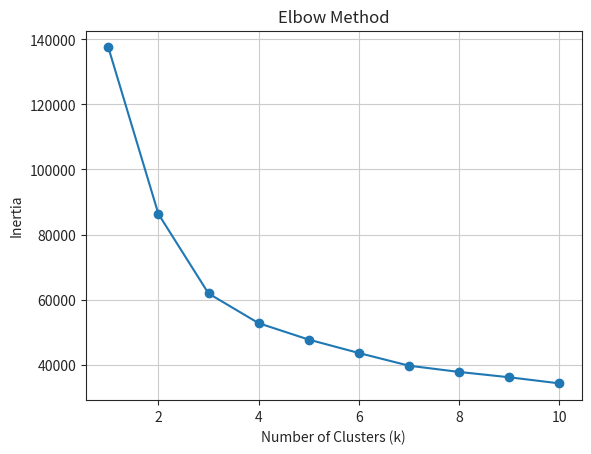

In [109]:
# Elbow Method를 이용한 최적 k 찾기 (선택 사항)
inertia = []
k_range = range(1, 11)

for i in k_range:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

# Elbow plot
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [24]:
df_scaled.shape[0] * 0.05

17511.350000000002

클러스터가 3개일 때의 평균 실루엣 계수: 0.5904


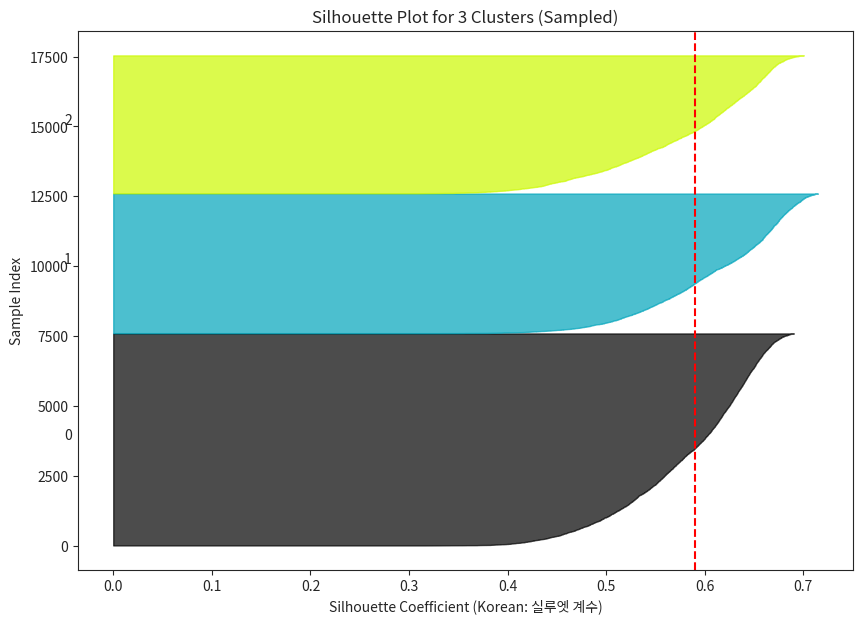

In [110]:
# 1. KMeans 모델 학습 (클러스터 개수 4)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# 원본 데이터프레임에 클러스터 컬럼 추가 (Korean: 클러스터 컬럼)
df_scaled['cluster'] = cluster_labels  # df의 인덱스와 df_scaled가 동일하다고 가정합니다.

# 2. 전체 평균 실루엣 계수 계산 (빠른 계산을 위해 sample_size 사용)
n_samples = df_scaled.shape[0]
sample_size = max(1000, int(n_samples * 0.05))
silhouette_avg = silhouette_score(df_scaled, cluster_labels, sample_size=sample_size, random_state=42)
print(f"클러스터가 {k}개일 때의 평균 실루엣 계수: {silhouette_avg:.4f}")

# 3. 일부 샘플만 선택하여 실루엣 계수 계산 및 시각화
np.random.seed(42)  # 재현성을 위한 seed 설정
sample_indices = np.random.choice(df_scaled.index, size=sample_size, replace=False)
X_sample = df_scaled.loc[sample_indices]
cluster_labels_sample = cluster_labels[sample_indices]

# 선택한 샘플에 대한 각 데이터 포인트의 실루엣 계수 계산
sample_silhouette_values = silhouette_samples(X_sample, cluster_labels_sample)

# 4. 샘플 데이터를 이용한 실루엣 Plot 시각화
plt.figure(figsize=(10, 7))
y_lower = 10  # 각 클러스터의 시작 y 위치

for i in range(k):
    # 클러스터 i에 해당하는 샘플의 실루엣 값들
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_sample == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # 클러스터 번호 표시 (Korean: 클러스터 번호)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # 다음 클러스터를 위한 간격

plt.xlabel("Silhouette Coefficient (Korean: 실루엣 계수)")
plt.ylabel("Sample Index")
plt.title(f"Silhouette Plot for {k} Clusters (Sampled)")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


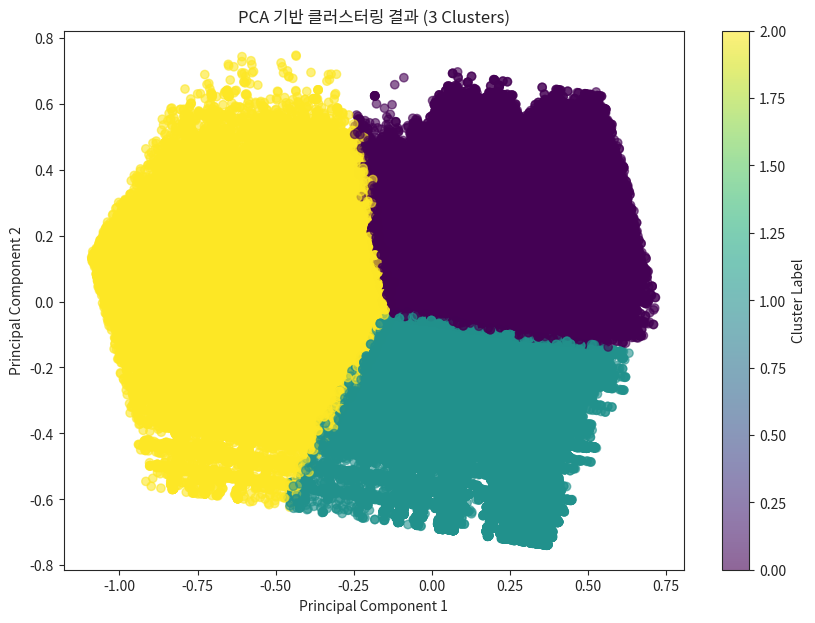

In [117]:
# 1) PCA를 이용해 2차원으로 축소
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(df_scaled.drop('cluster', axis=1))  # 클러스터 레이블 컬럼 제외

# 2) 산점도 그리기
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            c=df_scaled['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 기반 클러스터링 결과 (3 Clusters)')
plt.colorbar(label='Cluster Label')
plt.show()

## 5. 지도 이미지 출력

In [112]:
df_scaled_copy = df_scaled.copy()

In [113]:
df_scaled_copy["SIGUNGU_NM"] = merged_dataset["TWO_AREA_NM"]

In [114]:
# 2. 지도 생성
map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
m = folium.Map(location=map_center, zoom_start=8)

# 4. Choropleth 레이어 추가 (여기서 key_on을 올바르게 지정)
Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=df_scaled_copy,
    columns=['SIGUNGU_NM', 'cluster'],
    key_on='feature.properties.SIGUNGU_NM',  # GeoJSON의 속성과 DataFrame의 열이 일치해야 합니다.
    fill_color='YlGnBu',  # 적절한 컬러 스케일 지정 (예: 'BuPu', 'YlGnBu', 등)
    fill_opacity=1,
    line_opacity=0.8,
    legend_name='Cluster'
).add_to(m)

In [115]:
for _, row in gdf.iterrows():
    # 피처의 중앙 좌표 계산
    centroid = row.geometry.centroid
    # Marker 추가 (텍스트는 시군구 이름으로 지정)
    folium.Marker(
        location=[centroid.y, centroid.x],
        icon=DivIcon(
            icon_size=(150, 36),
            icon_anchor=(75, 18),
            html=f'<div style="font-size: 8px; color: black; text-align: center;">{row["SIGUNGU_NM"]}</div>'
        )
    ).add_to(m)

In [118]:
# 지도 출력
# m